In [1]:
from snowflake_helper.snowflake_helper import SnowflakeHelper

In [2]:
from BSG_utils import product_visualizer
import pandas as pd
import ast

In [3]:
snowflake_manager = SnowflakeHelper()
QUERY = 'select * from PLAYGROUNDS.ADRIANCAMPOY.ARTICLES_INFO;'
data = snowflake_manager.load_data_from_query(QUERY)

In [4]:
closest_items = pd.read_csv('gs://bsg-image-recommendation/ALBEF/ALBEF_closest_articles_per_product_test.csv')

In [5]:
closest_items.head()

,id,output
0,811502,"['PM-35135', 'PM-35622', 'PM-35626', 'PM-33125..."
1,405810,"['PM-30639', '715457', 'PM-6961', 'PM-37786', ..."
2,PM-41838,"['PM-23989', 'PM-41870', 'PM-41867', 'PM-37561..."
3,PM-34188,"['PM-32215', 'PM-33724', 'MJ-278919', 'MJ-2759..."
4,PM-32518,"['PM-13017', 'PM-43971', 'PM-12999', 'PM-22245..."


In [6]:
data.keys()

Index(['display_product_id', 'product_no', 'country_code', 'title',
       'description', 'product_group', 'product_group_level_1_description',
       'product_group_level_2_description',
       'product_group_level_3_description', 'collection', 'brand', 'gender',
       'brand_segment', 'base_colour', 'average_price', 'average_cost_sek',
       'average_gp2_sek', 'quantity_sold', 'images_link', 'max_age',
       'min_age'],
      dtype='object')

In [7]:
data = data[data['country_code']=='SE']

In [34]:
article_to_get_recommendations_from = 'PM-26130'

main_article_data = data[data['product_no']==article_to_get_recommendations_from]
recommended_products = closest_items[closest_items['id']==article_to_get_recommendations_from]['output'].tolist()
recommended_products = ast.literal_eval(recommended_products[0])
article_numbers_data = data[data['product_no'].isin(recommended_products)]

In [35]:
article_numbers_data['scoring'] = 0

# Checking for same category
if main_article_data['product_group_level_3_description'] is not None:
    article_numbers_data.loc[article_numbers_data['product_group_level_3_description'].isin(
        main_article_data['product_group_level_3_description'].tolist()), 'scoring'] += 2

if main_article_data['product_group_level_2_description'] is not None:
    article_numbers_data.loc[article_numbers_data['product_group_level_2_description'].isin(
        main_article_data['product_group_level_2_description'].tolist()), 'scoring'] += 1
    
# Checking for same brand
article_numbers_data.loc[article_numbers_data['brand'].isin(main_article_data['brand'].tolist()), 'scoring'] += 1

#Checking for same colour
article_numbers_data.loc[article_numbers_data['base_colour'].isin(main_article_data['base_colour'].tolist()), 'scoring'] += 0.5


# Scoring for the distribution of sizes in stock. Distribution of sizes should be or maybe shouldn't be different to the 
#sizes that we have now. Probably penalization if there is low stock.

# We could take this data and see which product they click on. Trying to predict the next item (these factors should be trained)
# List wise loss. 
# "estimated value of click/ estimated GP2/GP3 of the click"

# Session based similar items.

# Priority: Simplicity in design. 

# check time to compute closest items. 



/var/folders/2n/ct3fgq516b158h6zx5s586640000gn/T/ipykernel_1678/3264578516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  article_numbers_data['scoring'] = 0


In [36]:
article_numbers_data = article_numbers_data.sort_values(by='scoring', ascending=False)




In [37]:
recommended_products = article_numbers_data['product_no'].tolist()
article_titles = article_numbers_data['title'].tolist()
article_images = article_numbers_data['images_link'].tolist()
avg_prices = article_numbers_data['average_price'].tolist()
article_brands = article_numbers_data['brand'].tolist()

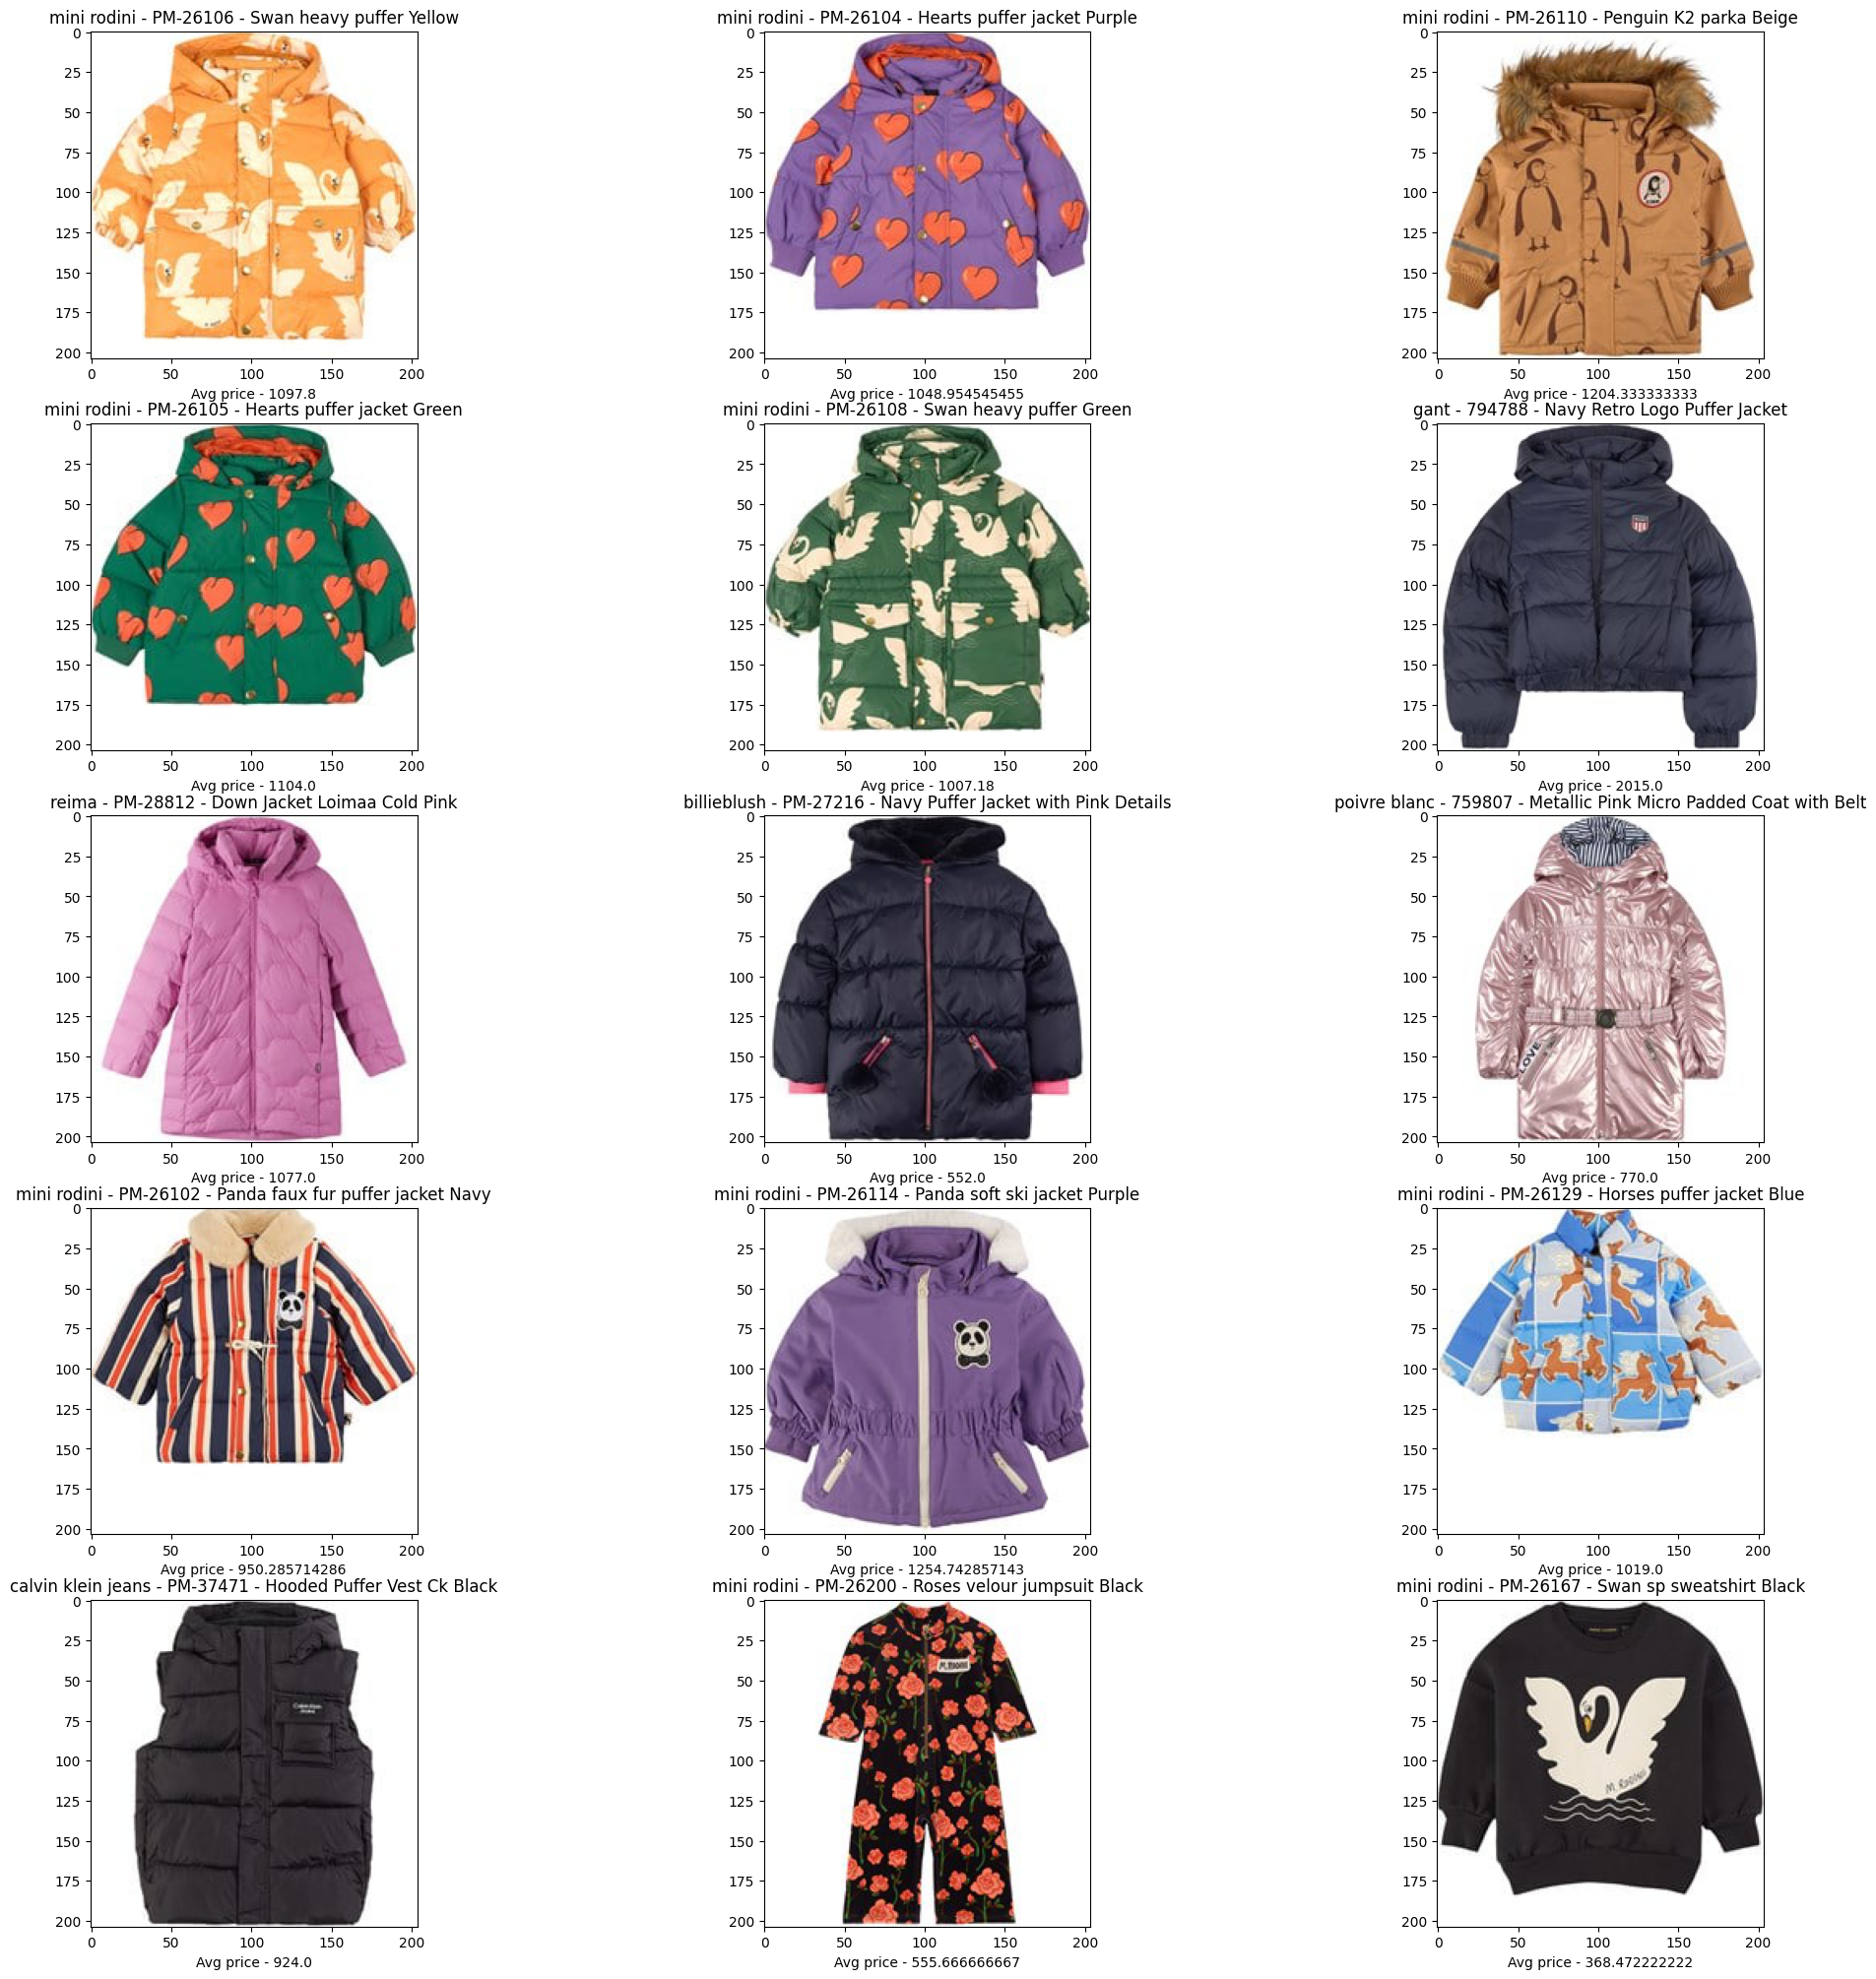

In [38]:
product_visualizer(article_numbers = recommended_products, article_brands = article_brands, article_titles = article_titles, article_images = article_images, avg_prices=avg_prices, n_rows=5, n_cols=3)
